In [17]:
import cv2 
import os 
import glob
import json
import numpy as np


import matplotlib.pyplot as plt 

from tqdm import tqdm 
from module.utils import imread
from module.disp_measure import convert_by_img

In [18]:
sensor_num = 195
sensor_num = str(sensor_num)


img_list = glob.glob(os.path.join(r'imgs', sensor_num, '*.jpg'))

with open('params.json') as param_config_json : 
    param_config = json.load(param_config_json)
    


In [19]:
params = param_config[sensor_num]

result = [] 
src_img = imread(img_list[0])

for img_path in tqdm(img_list): 
    dest_img = imread(img_path)
    result.append(convert_by_img(dest_img,
                                 src_img,
                                 min_rad = params['min_rad'],
                                 max_rad = params['max_rad'],
                                 param1 = params['param1'],
                                 param2 = params['param2'],
                                ))

 15%|████████████▏                                                                     | 10/67 [00:01<00:11,  5.17it/s]

You are here


 16%|█████████████▍                                                                    | 11/67 [00:01<00:12,  4.62it/s]

You are here
You are here
You are here
You are here
You are here
You are here


 18%|██████████████▋                                                                   | 12/67 [00:02<00:13,  4.14it/s]

You are here
You are here


 27%|██████████████████████                                                            | 18/67 [00:03<00:13,  3.68it/s]

You are here
You are here


 28%|███████████████████████▎                                                          | 19/67 [00:04<00:13,  3.49it/s]

You are here
You are here
You are here


 30%|████████████████████████▍                                                         | 20/67 [00:04<00:14,  3.35it/s]

You are here
You are here


 31%|█████████████████████████▋                                                        | 21/67 [00:04<00:13,  3.39it/s]

You are here
You are here
You are here
You are here


 54%|████████████████████████████████████████████                                      | 36/67 [00:06<00:06,  4.96it/s]

You are here
You are here
You are here
You are here
You are here
You are here
You are here


 55%|█████████████████████████████████████████████▎                                    | 37/67 [00:07<00:06,  4.39it/s]

You are here
You are here


 57%|██████████████████████████████████████████████▌                                   | 38/67 [00:07<00:07,  4.06it/s]

You are here
You are here
You are here


 58%|███████████████████████████████████████████████▋                                  | 39/67 [00:07<00:07,  3.80it/s]

You are here
You are here
You are here
You are here


 60%|████████████████████████████████████████████████▉                                 | 40/67 [00:07<00:07,  3.66it/s]

You are here
You are here
You are here


 63%|███████████████████████████████████████████████████▍                              | 42/67 [00:08<00:06,  3.60it/s]

You are here
You are here
You are here
You are here
You are here
You are here
You are here


 64%|████████████████████████████████████████████████████▋                             | 43/67 [00:08<00:06,  3.47it/s]

You are here
You are here
You are here
You are here


 66%|█████████████████████████████████████████████████████▊                            | 44/67 [00:09<00:06,  3.48it/s]

You are here
You are here
You are here
You are here
You are here


 82%|███████████████████████████████████████████████████████████████████▎              | 55/67 [00:10<00:01,  7.81it/s]

You are here
You are here


 96%|██████████████████████████████████████████████████████████████████████████████▎   | 64/67 [00:12<00:00,  4.47it/s]

You are here
You are here


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 66/67 [00:12<00:00,  4.35it/s]

You are here
You are here
You are here
You are here
You are here
You are here
You are here


100%|██████████████████████████████████████████████████████████████████████████████████| 67/67 [00:13<00:00,  5.05it/s]


In [20]:
collect_rslt = []
for rslt in result : 
    collect_rslt.append(rslt[0])

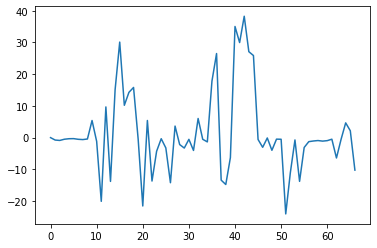

In [21]:
plt.plot(np.array(collect_rslt))

In [2]:
## check the circle detection accuracy 

param1 = 10
param2 = 30
min_rad = 75
max_rad = 95
img = imread(img_list[0]) 
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret3, th3 = cv2.threshold(grey_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)



NameError: name 'imread' is not defined

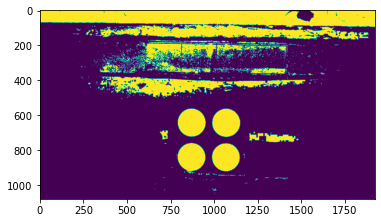

In [32]:
plt.imshow(th3)

In [33]:
# th3 = 255 - th3

circles = cv2.HoughCircles(th3, 
                           cv2.HOUGH_GRADIENT,
                           1, 
                           20, 
                           param1=param1,
                           param2=param2,
                           minRadius=min_rad,
                           maxRadius=max_rad)

# Draw circles that are detected. 
if circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    circles = np.uint16(np.around(circles)) 
  
    for pt in circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(th3, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(th3, (a, b), 1, (0, 0, 255), 3) 
        cv2.imshow("Detected Circle", th3) 
        cv2.waitKey(0) 
else:
        cv2.imshow('Circle is not detected', th3)
        cv2.waitKey(0) 

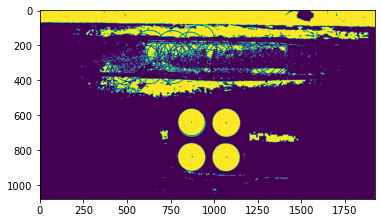